In [ ]:
from google.colab import drive
import pandas as pd

# 1. Montar tu Google Drive
drive.mount('/content/drive')

# 2. Rutas a tus archivos en Drive (ajusta si est√°n en otra carpeta)
csv_path = '/content/drive/My Drive/resultados.csv'
pkl_path = '/content/drive/My Drive/resultados.pkl'

# 3. Cargar desde CSV
df_csv = pd.read_csv(csv_path, encoding='utf-8-sig')

print("=== CSV: Primeras 10 filas ===")
print(df_csv.head(10))

print("\n=== CSV: √öltimas 10 filas ===")
print(df_csv.tail(10))

print(f"\nCSV ‚Äì Total de registros: {len(df_csv):,}")

# 4. Cargar desde Pickle
df_pkl = pd.read_pickle(pkl_path)

print("\n=== Pickle: Primeras 10 filas ===")
print(df_pkl.head(10))

print("\n=== Pickle: √öltimas 10 filas ===")
print(df_pkl.tail(10))

print(f"\nPickle ‚Äì Total de registros: {len(df_pkl):,}")


Mounted at /content/drive
=== CSV: Primeras 10 filas ===
      type    subreddit                                              title  \
0     Post  immigration                 N400 Interview @ San Francisco, CA   
1     Post  immigration                                  Travel to Germany   
2     Post  immigration        K1 administrative processing for a year now   
3     Post  immigration           Need help navigating through immigration   
4  Comment  immigration  Comment on: Need help navigating through immig...   
5  Comment  immigration  Comment on: Need help navigating through immig...   
6  Comment  immigration  Comment on: Need help navigating through immig...   
7  Comment  immigration  Comment on: Need help navigating through immig...   
8  Comment  immigration  Comment on: Need help navigating through immig...   
9  Comment  immigration  Comment on: Need help navigating through immig...   

                                                text  score  num_comments  \
0  hey 

In [ ]:
# Instala las librer√≠as clave para PNL avanzado
!pip install transformers sentencepiece accelerate
!pip install nltk
!pip install bertopic # Para el modelado de temas (Topic Modeling)

# Descarga recursos necesarios de NLTK
import nltk
nltk.download('stopwords')

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13.8/13.8 MB 36.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 24.6/24.6 MB 33.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 883.7/883.7 kB 50.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 664.8/664.8 MB 3.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import pandas as pd
from google.colab import drive
import re
from nltk.corpus import stopwords
import nltk

# --- 1. Cargar los Datos desde Google Drive ---
print("üìÇ Montando Google Drive...")
drive.mount('/content/drive')

# Define la ruta a tu archivo. Usaremos el Pickle por ser m√°s robusto.
pkl_path = '/content/drive/My Drive/resultados.pkl'

print(f"üîÑ Cargando datos desde: {pkl_path}")
# Carga los datos desde el archivo Pickle y as√≠gnalos a la variable 'df'
df = pd.read_pickle(pkl_path)
print(f"‚úÖ Datos cargados con √©xito. Total de registros: {len(df):,}")


# --- 2. Preparar y Ejecutar la Limpieza de Texto ---

# Descarga las 'stopwords' (palabras comunes como 'the', 'a', 'is')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    """
    Funci√≥n para limpiar texto: quita URLs, menciones, hashtags,
    caracteres especiales y convierte a min√∫sculas.
    """
    if not isinstance(text, str):
        return ""
    text = text.lower()  # Convertir a min√∫sculas
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Quitar URLs
    text = re.sub(r'<.*?>', '', text)  # Quitar etiquetas HTML
    text = re.sub(r'@\w+', '', text)  # Quitar menciones
    text = re.sub(r'#\w+', '', text)  # Quitar hashtags
    text = re.sub(r'[^a-z\s]', '', text)  # Quitar todo lo que no sea letras o espacios
    text = ' '.join([word for word in text.split() if word not in stop_words]) # Quitar stopwords
    return text

# ¬°Ahora este c√≥digo funcionar√° porque 'df' ya existe!
print("\nüßπ Limpiando el texto de los posts y comentarios...")
df['text_clean'] = df['text'].apply(clean_text)
print("‚úÖ Limpieza completada.")

# Muestra el resultado para verificar
print("\n--- Vista Previa del Texto Limpio ---")
display(df[['text', 'text_clean']].head())

üìÇ Montando Google Drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
üîÑ Cargando datos desde: /content/drive/My Drive/resultados.pkl
‚úÖ Datos cargados con √©xito. Total de registros: 21,924

üßπ Limpiando el texto de los posts y comentarios...


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


‚úÖ Limpieza completada.

--- Vista Previa del Texto Limpio ---


text  \
0  hey everyone, i‚Äôm not sure if i can post this ...   
1  ÿßŸÜÿß ÿπŸÜÿØŸä Ÿ°Ÿ® ÿ≥ŸÜŸá ŸÖÿ™ÿßÿÆÿ± ÿ≥ŸÜŸá ŸàŸÑÿ≥ÿß Ÿáÿ®ÿØÿß ÿ™ÿßŸÑÿ™Ÿá ÿ´ÿßŸÜŸà...   
2  Hello, so my finance went to her interview and...   
3  I am attempting to keep this a vague as possib...   
4  Given you're over 21, your path is basically m...   

                                          text_clean  
0  hey everyone im sure post wanted ask anyone go...  
1  b years old year late start third year high sc...  
2  hello finance went interview everything went f...  
3  attempting keep vague possible immigrant resid...  
4  given youre path basically marrying us citizen...

In [ ]:
from transformers import pipeline
import torch

# Detecta si hay una GPU disponible para acelerar el proceso
device = 0 if torch.cuda.is_available() else -1
print(f"Usando dispositivo: {'GPU' if device == 0 else 'CPU'}")

# Carga el pipeline de an√°lisis de sentimiento
sentiment_pipeline = pipeline(
    'sentiment-analysis',
    model='cardiffnlp/twitter-xlm-roberta-base-sentiment',
    device=device
)

# Analiza el texto limpio en lotes (batch)
print("\nüß† Realizando an√°lisis de sentimiento con modelo Transformer...")
textos_validos = df[df['text_clean'] != '']['text_clean'].tolist()

# ==============================================================================
#  PLAN B: TRUNCACI√ìN MANUAL (Soluci√≥n Definitiva)
# ==============================================================================
# Ya que el pipeline falla, cortamos manualmente cada texto a un n√∫mero
# de caracteres seguro. 512 tokens equivalen aprox. a 2000 caracteres.
# Esto garantiza que ning√∫n texto exceder√° el l√≠mite del modelo.

max_chars = 2000
textos_truncados = [texto[:max_chars] for texto in textos_validos]
print(f"‚úÇÔ∏è Plan B activado: Se han truncado todos los textos a un m√°ximo de {max_chars} caracteres.")

# Ahora le pasamos la lista de textos ya truncados y seguros
resultados_sentimiento = sentiment_pipeline(textos_truncados, batch_size=16, padding=True, truncation=True)


# Asigna los resultados de vuelta al DataFrame
print("‚úÖ An√°lisis de sentimiento completado. Asignando resultados...")
df_validos = df[df['text_clean'] != ''].copy()
# Usamos .lower() para estandarizar las etiquetas (ej. 'POSITIVE' -> 'positive')
df_validos['transformer_label'] = [res['label'].lower() for res in resultados_sentimiento]
df_validos['transformer_score'] = [res['score'] for res in resultados_sentimiento]

# Unimos los resultados con el DataFrame original
df = df.merge(df_validos[['transformer_label', 'transformer_score']], left_index=True, right_index=True, how='left')

# Muestra el resultado y el nuevo resumen de sentimientos
print("\n--- Vista Previa del An√°lisis Transformer ---")
display(df[['text', 'text_clean', 'transformer_label']].head())

print("\n--- Resumen de Sentimientos (Transformer) ---")
display(df['transformer_label'].value_counts(normalize=True).map('{:.2%}'.format))

Usando dispositivo: GPU


Device set to use cuda:0
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.



üß† Realizando an√°lisis de sentimiento con modelo Transformer...
‚úÇÔ∏è Plan B activado: Se han truncado todos los textos a un m√°ximo de 2000 caracteres.
‚úÖ An√°lisis de sentimiento completado. Asignando resultados...

--- Vista Previa del An√°lisis Transformer ---


text  \
0  hey everyone, i‚Äôm not sure if i can post this ...   
1  ÿßŸÜÿß ÿπŸÜÿØŸä Ÿ°Ÿ® ÿ≥ŸÜŸá ŸÖÿ™ÿßÿÆÿ± ÿ≥ŸÜŸá ŸàŸÑÿ≥ÿß Ÿáÿ®ÿØÿß ÿ™ÿßŸÑÿ™Ÿá ÿ´ÿßŸÜŸà...   
2  Hello, so my finance went to her interview and...   
3  I am attempting to keep this a vague as possib...   
4  Given you're over 21, your path is basically m...   

                                          text_clean transformer_label  
0  hey everyone im sure post wanted ask anyone go...           neutral  
1  b years old year late start third year high sc...           neutral  
2  hello finance went interview everything went f...          negative  
3  attempting keep vague possible immigrant resid...          negative  
4  given youre path basically marrying us citizen...          negative


--- Resumen de Sentimientos (Transformer) ---


transformer_label
neutral     56.23%
negative    32.27%
positive    11.50%
Name: proportion, dtype: object

In [ ]:
from bertopic import BERTopic

# Filtra solo los textos negativos con suficiente contenido
docs_negativos = df[(df['transformer_label'] == 'negative') & (df['text_clean'].str.len() > 50)]['text_clean'].tolist()

if len(docs_negativos) > 20: # Se necesita un m√≠nimo de documentos
    print(f"\nüìä Descubriendo temas en {len(docs_negativos)} comentarios negativos...")
    topic_model = BERTopic(language="english", verbose=False)
    topics, _ = topic_model.fit_transform(docs_negativos)

    # Muestra los temas encontrados
    print("üî• Principales Temas de Frustraci√≥n:")
    display(topic_model.get_topic_info())
else:
    print("\nNo hay suficientes textos negativos para un an√°lisis de temas robusto.")


üìä Descubriendo temas en 5429 comentarios negativos...


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

üî• Principales Temas de Frustraci√≥n:


Topic  Count                                    Name  \
0      -1   2495                    -1_us_get_would_visa   
1       0    260                           0_sa_na_ng_ko   
2       1    208             1_card_green_charge_charges   
3       2    148                 2_ice_agents_los_police   
4       3    132               3_trump_people_white_nazi   
..    ...    ...                                     ...   
73     72     11               72_ar_address_online_form   
74     73     11            73_degree_sponsor_visa_sorry   
75     74     10               74_news_biased_result_bad   
76     75     10        75_shes_daughter_thinking_bright   
77     76     10  76_college_teachers_education_dynamics   

                                       Representation  \
0   [us, get, would, visa, dont, im, like, work, p...   
1      [sa, na, ng, ko, yung, ang, ka, mo, lang, mga]   
2   [card, green, charge, charges, dismissed, crim...   
3   [ice, agents, los, police, enforcement, people...   
4   [trump, people, white, nazi, power, fucking, n...   
..                                                ...   
73  [ar, address, online, form, update, change, ju...   
74  [degree, sponsor, visa, sorry, university, ste...   
75  [news, biased, result, bad, rules, ban, postin...   
76  [shes, daughter, thinking, bright, emotional, ...   
77  [college, teachers, education, dynamics, cheap...   

                                  Representative_Docs  
0   [personal background europe telecom engineer m...  
1   [advice ko try looking ways ease physical burd...  
2   [hi im hoping someone gone something similar i...  
3   [recent ice posts reddit man pregnant woman ta...  
4   [centuries california remained nonwhite fact n...  
..                                                ...  
73  [thank input update address online moment move...  
74  [yea sorry doesnt work like need visa live wor...  
75  [reposting banned muted rimmigration misinform...  
76  [im sorry situation sounds like political envi...  
77  [us desperately needs teachers willing teach t...  

[78 rows x 5 columns]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Palabras clave para filtrar los comentarios m√°s relevantes
app_keywords = ['lawfully', 'case tracker', 'hilites', 'myuscis', 'status checker', 'uscis app']
work_visa_keywords = ['h1b', 'tn', 'l1', 'o1', 'work visa', 'work permit', 'employer sponsorship']
relevant_keywords = app_keywords + work_visa_keywords

# Crea una expresi√≥n regular para buscar cualquiera de las palabras clave
# 'case_sensitive=False' asegura que encuentre 'H1B', 'h1b', 'H1b', etc.
regex_pattern = '|'.join(relevant_keywords)
df_relevant = df[
    (df['type'] == 'Comment') &
    (df['text'].str.contains(regex_pattern, case=False, na=False))
].copy()

print(f"üîé Se encontraron {len(df_relevant)} comentarios relevantes sobre visas de trabajo y/o apps.")

üîé Se encontraron 1431 comentarios relevantes sobre visas de trabajo y/o apps.


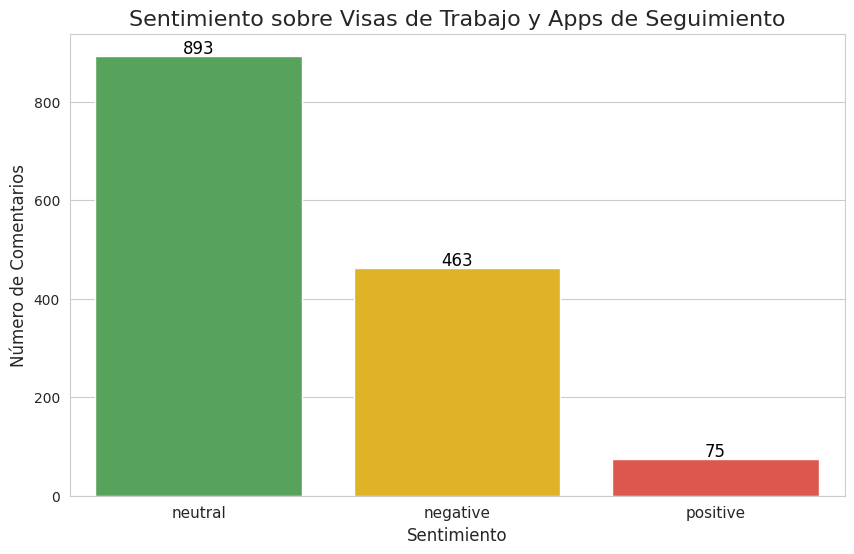

In [ ]:
# --- Gr√°fico de Sentimiento ---
if not df_relevant.empty:
    plt.figure(figsize=(10, 6))
    sns.set_style("whitegrid")

    # Contar los valores de cada etiqueta de sentimiento
    sentiment_counts = df_relevant['transformer_label'].value_counts()

    # Crear el gr√°fico
    ax = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=['#4CAF50', '#FFC107', '#F44336'])

    plt.title('Sentimiento sobre Visas de Trabajo y Apps de Seguimiento', fontsize=16)
    plt.ylabel('N√∫mero de Comentarios', fontsize=12)
    plt.xlabel('Sentimiento', fontsize=12)
    plt.xticks(fontsize=11)

    # A√±adir el n√∫mero exacto sobre cada barra
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                    textcoords='offset points')

    plt.show()
else:
    print("No hay suficientes datos relevantes para generar el gr√°fico.")

In [ ]:
from transformers import pipeline
from IPython.display import display, Markdown

# Carga el modelo de traducci√≥n de Ingl√©s a Espa√±ol
# Este paso puede tardar un minuto la primera vez que se ejecuta
print("üß† Cargando modelo de traducci√≥n (puede tardar un momento)...")
translator = pipeline("translation_en_to_es", model="Helsinki-NLP/opus-mt-en-es")
print("‚úÖ Modelo de traducci√≥n listo.")

üß† Cargando modelo de traducci√≥n (puede tardar un momento)...


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/312M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/312M [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/826k [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

Device set to use cuda:0


‚úÖ Modelo de traducci√≥n listo.


In [ ]:
import textwrap

def mostrar_comentario_en_tarjeta(comentario_row):
    """
    Toma una fila de un DataFrame y la imprime en un formato de tarjeta de texto plano.
    """
    # --- Configuraci√≥n de la Tarjeta ---
    ancho_total = 80  # Ancho total de la tarjeta en caracteres
    padding_texto = 2
    ancho_texto = ancho_total - (padding_texto * 2) - 2 # Ancho para el texto del comentario

    # --- Asignaci√≥n de Emoji y Etiqueta ---
    label = comentario_row['transformer_label']
    if label == 'positive':
        etiqueta = "‚úÖ POSITIVO"
    elif label == 'negative':
        etiqueta = "‚ùå NEGATIVO"
    else:
        etiqueta = "‚ûñ NEUTRAL"

    # --- Creaci√≥n del Encabezado ---
    score_str = f"PUNTUACI√ìN: {comentario_row['score']}"
    subreddit_str = f"SUBREDDIT: r/{comentario_row['subreddit']}"
    header_info = f"{etiqueta} | {score_str} | {subreddit_str}"

    # --- Impresi√≥n de la Tarjeta ---
    print('‚ïî' + '‚ïê' * (ancho_total - 2) + '‚ïó')
    print('‚ïë' + header_info.center(ancho_total - 2) + '‚ïë')
    print('‚ïü' + '‚îÄ' * (ancho_total - 2) + '‚ï¢')

    # --- Procesamiento y P√°rrafo del Comentario ---
    texto_traducido = f'"{comentario_row["texto_traducido"]}"'
    lineas_envueltas = textwrap.wrap(texto_traducido, width=ancho_texto)

    for linea in lineas_envueltas:
        # Justifica la l√≠nea y a√±ade padding y los bordes
        print('‚ïë' + ' ' * padding_texto + linea.ljust(ancho_texto) + ' ' * padding_texto + '‚ïë')

    print('‚ïö' + '‚ïê' * (ancho_total - 2) + '‚ïù')
    print() # A√±ade un espacio entre tarjetas


# ==============================================================================
# üèÜ TOP 20 COMENTARIOS M√ÅS RELEVANTES (NUEVO FORMATO DE TEXTO) üèÜ
# ==============================================================================

# Aseg√∫rate de que los comentarios est√©n traducidos
if 'texto_traducido' not in top_20_comments.columns:
    print("üîÑ Traduciendo los 20 comentarios m√°s importantes... esto puede tardar unos minutos.")
    top_20_comments = df_relevant.sort_values(by='score', ascending=False).head(20)

    if not top_20_comments.empty:
        textos_a_traducir = top_20_comments['text'].tolist()
        traducciones = translator(textos_a_traducir)
        top_20_comments['texto_traducido'] = [t['translation_text'] for t in traducciones]
        print("‚úÖ Traducci√≥n completada. Mostrando resultados:\n")
    else:
        print("No se encontraron comentarios relevantes para mostrar.")
else:
    print("‚úÖ Comentarios ya traducidos. Mostrando resultados:\n")


# Itera y muestra cada comentario usando la nueva funci√≥n de formato
if not top_20_comments.empty:
    for index, row in top_20_comments.iterrows():
        mostrar_comentario_en_tarjeta(row)

‚úÖ Comentarios ya traducidos. Mostrando resultados:

‚ïî‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïó
‚ïë             ‚ûñ NEUTRAL | PUNTUACI√ìN: 173 | SUBREDDIT: r/EyesOnIce             ‚ïë
‚ïü‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ï¢
‚ïë  "Amazon necesita permiso de trabajo y SSN para que la gente trabaje para    ‚ïë
‚ïë  ellos - eso significa que es lo suficientemente legal para trabajar ..."    ‚ïë
‚ïö‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



‚òÅÔ∏è Preparando datos para la Nube de Palabras en Espa√±ol...
üîÑ Traduciendo una muestra de hasta 500 comentarios (puede tardar)...
‚úÖ Traducci√≥n para la nube de palabras completada.


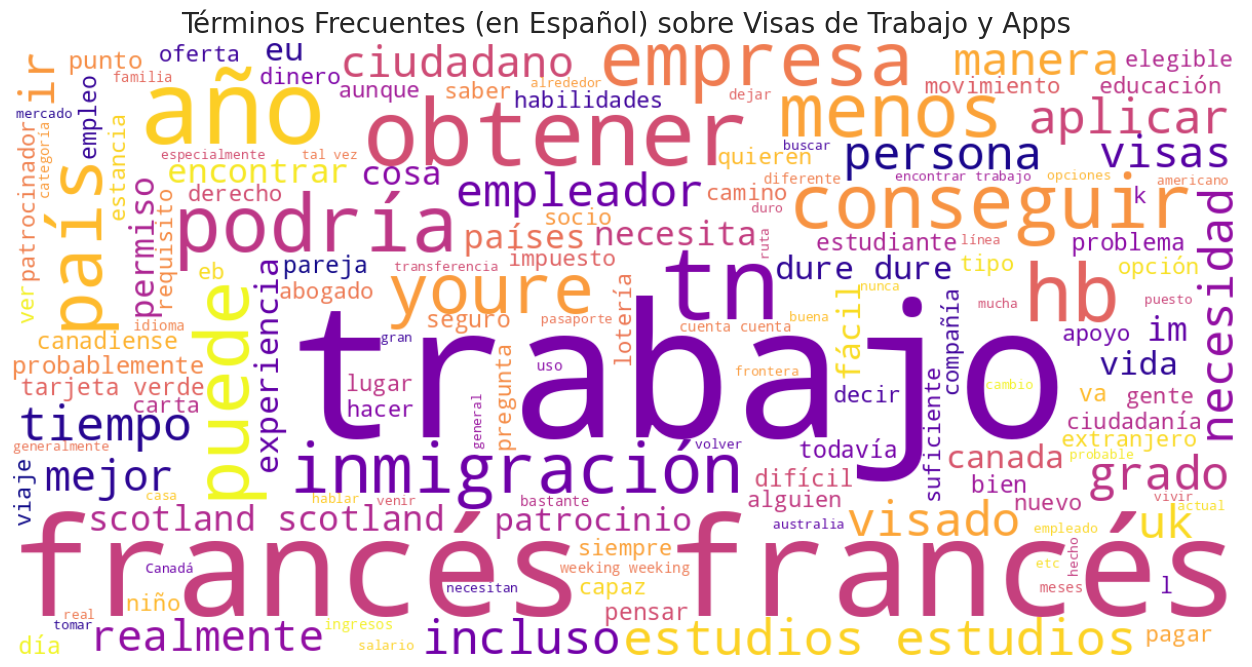

In [ ]:
import nltk
from nltk.corpus import stopwords

# Descarga las stopwords (palabras comunes) en espa√±ol
nltk.download('stopwords')
stopwords_es = set(stopwords.words('spanish'))

# A√±ade palabras comunes del contexto que no aportan valor
palabras_irrelevantes = ['visa', 'uscis', 'h1b', 'greencard', 'caso', 'proceso', 'aplicaci√≥n', 'gracias']
stopwords_es.update(palabras_irrelevantes)


# --- Nube de Palabras en Espa√±ol ---
if not df_relevant.empty:
    print("\n‚òÅÔ∏è Preparando datos para la Nube de Palabras en Espa√±ol...")
    print("üîÑ Traduciendo una muestra de hasta 500 comentarios (puede tardar)...")

    # Toma una muestra grande para la nube de palabras y traduce el texto limpio
    sample_for_wordcloud = df_relevant.sort_values(by='score', ascending=False).head(500)
    textos_limpios_a_traducir = sample_for_wordcloud['text_clean'].dropna().tolist()

    if textos_limpios_a_traducir:
        traducciones_wc = translator(textos_limpios_a_traducir)
        full_text_es = ' '.join([t['translation_text'] for t in traducciones_wc])
        print("‚úÖ Traducci√≥n para la nube de palabras completada.")

        # Genera la nube de palabras con las stopwords en espa√±ol
        wordcloud = WordCloud(width=1200, height=600, background_color='white',
                              stopwords=stopwords_es, colormap='plasma',
                              max_words=150).generate(full_text_es)

        plt.figure(figsize=(16, 8))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title('T√©rminos Frecuentes (en Espa√±ol) sobre Visas de Trabajo y Apps', fontsize=20)
        plt.show()
    else:
        print("No hay texto limpio para generar la nube de palabras.")
else:
    print("No hay suficientes datos para generar la nube de palabras.")

üéØ Iniciando an√°lisis enfocado en Apps de Seguimiento...
üîé Se encontraron 19 comentarios relevantes sobre apps de seguimiento.


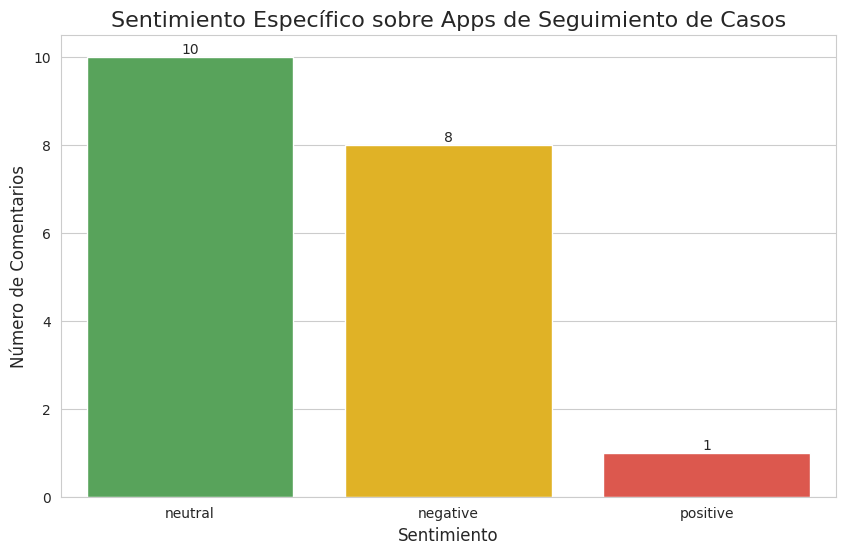


üèÜ TOP COMENTARIOS SOBRE APPS DE SEGUIMIENTO (TRADUCIDOS) üèÜ

üîÑ Traduciendo los comentarios m√°s importantes sobre apps...
‚úÖ Traducci√≥n completada. Mostrando resultados:

‚ïî‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïó
‚ïë               ‚ùå NEGATIVO | PUNTUACI√ìN: 26 | SUBREDDIT: r/expat               ‚ïë
‚ïü‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ï¢
‚ïë  "En primer lugar - Asumiendo que usted no tiene la ciudadan√≠a relevante     ‚ïë
‚ïë  para uno de esos pa√≠ses, ¬øc√≥mo planea obtener una visa para mudarse all√≠?   ‚ïë
‚ïë  Usted no puede legalmente llegar all√≠ y quedarse. Usted necesita ob

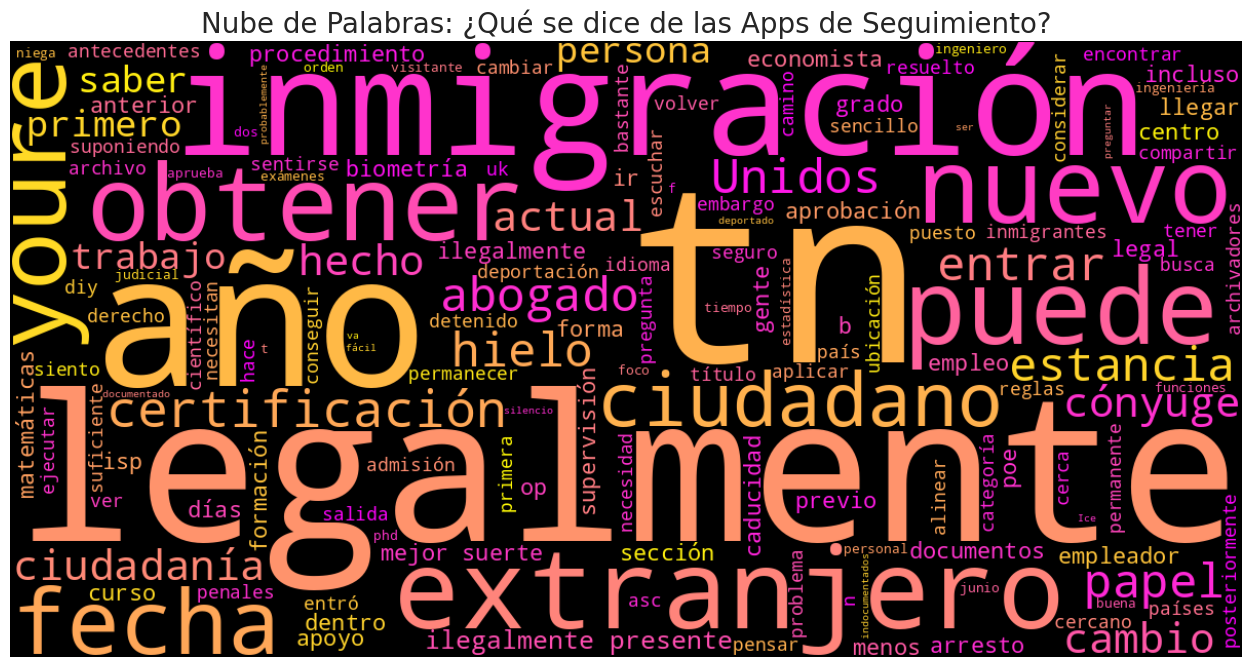

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import textwrap
import nltk
from nltk.corpus import stopwords
from transformers import pipeline
from IPython.display import display, Markdown

# ==============================================================================
#  AN√ÅLISIS ENFOCADO: APPS DE SEGUIMIENTO DE CASOS
# ==============================================================================
print("üéØ Iniciando an√°lisis enfocado en Apps de Seguimiento...")

# --- 1. Filtrar Comentarios que Mencionan Apps ---
app_keywords = ['lawfully', 'case tracker', 'hilites', 'myuscis', 'status checker', 'uscis app', 'visa tracking', 'online tracker']
regex_pattern_apps = '|'.join(app_keywords)

# Filtramos el DataFrame original 'df' para encontrar solo comentarios sobre apps
df_apps = df[
    (df['type'] == 'Comment') &
    (df['text'].str.contains(regex_pattern_apps, case=False, na=False))
].copy()

if df_apps.empty:
    print("‚ö†Ô∏è No se encontraron comentarios que mencionen apps de seguimiento con las palabras clave actuales.")
else:
    print(f"üîé Se encontraron {len(df_apps)} comentarios relevantes sobre apps de seguimiento.")

    # --- 2. Gr√°fico: Sentimiento Espec√≠fico sobre las Apps ---
    plt.figure(figsize=(10, 6))
    sns.set_style("whitegrid")
    sentiment_counts_apps = df_apps['transformer_label'].value_counts()
    ax_apps = sns.barplot(x=sentiment_counts_apps.index, y=sentiment_counts_apps.values, palette=['#4CAF50', '#FFC107', '#F44336'])
    plt.title('Sentimiento Espec√≠fico sobre Apps de Seguimiento de Casos', fontsize=16)
    plt.ylabel('N√∫mero de Comentarios', fontsize=12)
    plt.xlabel('Sentimiento', fontsize=12)
    for p in ax_apps.patches:
        ax_apps.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
    plt.show()

    # --- 3. Top Comentarios sobre Apps (Traducidos y en Tarjetas) ---
    print("\n" + "="*80)
    print("üèÜ TOP COMENTARIOS SOBRE APPS DE SEGUIMIENTO (TRADUCIDOS) üèÜ")
    print("="*80 + "\n")

    # Tomamos los 15 m√°s votados para este an√°lisis enfocado
    top_app_comments = df_apps.sort_values(by='score', ascending=False).head(15)

    if not top_app_comments.empty:
        # Carga el modelo si no est√° ya cargado
        try:
            translator
        except NameError:
            print("üß† Cargando modelo de traducci√≥n...")
            translator = pipeline("translation_en_to_es", model="Helsinki-NLP/opus-mt-en-es")
            print("‚úÖ Modelo de traducci√≥n listo.")

        print("üîÑ Traduciendo los comentarios m√°s importantes sobre apps...")
        textos_a_traducir_apps = top_app_comments['text'].tolist()
        traducciones_apps = translator(textos_a_traducir_apps)
        top_app_comments['texto_traducido'] = [t['translation_text'] for t in traducciones_apps]
        print("‚úÖ Traducci√≥n completada. Mostrando resultados:\n")

        # Reutilizamos la funci√≥n de mostrar en tarjeta
        for index, row in top_app_comments.iterrows():
            mostrar_comentario_en_tarjeta(row) # Esta funci√≥n la definimos en la celda anterior
    else:
        print("No hay comentarios suficientes para mostrar un Top.")


    # --- 4. Nube de Palabras en Espa√±ol sobre Apps ---
    print("\n‚òÅÔ∏è Preparando datos para la Nube de Palabras sobre Apps...")
    # Descarga stopwords en espa√±ol si no se ha hecho
    try:
        stopwords_es
    except NameError:
        nltk.download('stopwords')
        stopwords_es = set(stopwords.words('spanish'))
        # A√±adimos los nombres de las apps para que no dominen la nube de palabras
        stopwords_es.update(['app', 'lawfully', 'hilites', 'tracker', 'case', 'caso'])

    textos_limpios_apps = df_apps['text_clean'].dropna().tolist()

    if textos_limpios_apps:
        print("üîÑ Traduciendo textos para la nube de palabras (esto puede tardar)...")
        traducciones_wc_apps = translator(textos_limpios_apps)
        full_text_es_apps = ' '.join([t['translation_text'] for t in traducciones_wc_apps])
        print("‚úÖ Traducci√≥n completada.")

        wordcloud_apps = WordCloud(width=1200, height=600, background_color='black',
                                   stopwords=stopwords_es, colormap='spring',
                                   max_words=150).generate(full_text_es_apps)

        plt.figure(figsize=(16, 8))
        plt.imshow(wordcloud_apps, interpolation='bilinear')
        plt.axis('off')
        plt.title('Nube de Palabras: ¬øQu√© se dice de las Apps de Seguimiento?', fontsize=20)
        plt.show()